In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Supreme Court.csv')
df

,user_country,source,content,date
0,Probably asleep,Twitter for iPhone,she was the first Justice to preside over gay ...,2020-09-29T23:59:53+00:00
1,NaN,Twitter Web App,…Supreme Court where Republicans managed to ge...,2020-09-29T23:59:51+00:00
2,NaN,Twitter Web App,@JoeBiden If Obamacare is so awesome why would...,2020-09-29T23:59:50+00:00
3,"Richmond, CA",Twitter for iPhone,@BidenWarRoom Please focus on the Supreme Cour...,2020-09-29T23:59:47+00:00
4,NaN,Twitter for iPhone,@Jordanfabian @jdawsey1 Someone should confron...,2020-09-29T23:59:47+00:00
...,...,...,...,...
1995,NaN,Twitter for Android,@Women4Biden @senatemajldr he's afraid to say ...,2020-09-29T22:15:53+00:00
1996,"Mirzapur, India",Twitter for iPhone,@KaustubhMehta97 @rohini_sgh Yea right as if o...,2020-09-29T22:15:51+00:00
1997,Woodland CA / Gold Beach OR,Twitter for iPhone,Do the Supreme Court Justices kind of “Watch O...,2020-09-29T22:15:50+00:00
1998,Los Angeles,Twitter Web App,The next #SupremeCourt nominee goes to Washing...,2020-09-29T22:15:46+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

65183
['she', 'was', 'the', 'first', 'justice', 'to', 'preside', 'over', 'gay', 'marriages', 'and', 'may', 'have', 'officiated', 'the', 'first', 'same-sex', 'marriage', 'at', 'the']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 189.26%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

29664
['first', 'justice', 'preside', 'gay', 'marriages', 'may', 'officiated', 'first', 'same-sex', 'marriage', 'supreme', 'court', 'supreme', 'court', 'republicans', 'managed', 'get', 'majority', 'number', 'judges']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 48),
 ('@joebiden', 41),
 ('@senschumer', 36),
 ('@thehill', 29),
 ('@kamalaharris', 27),
 ('@senatemajldr', 22),
 ('@youtube', 17),
 ('@potus', 15),
 ('@tedcruz', 13),
 ('@sidneypowell1', 12),
 ('@sentedcruz', 12),
 ('@senwarren', 11),
 ('@seanhannity', 11),
 ('@realjameswoods', 11),
 ('@gop', 10),
 ('@sencorygardner', 10),
 ('@petebuttigieg', 10),
 ('@senatedems', 9),
 ('@abc', 9),
 ('@foxnews', 8)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,Probably asleep,Twitter for iPhone,she was the first Justice to preside over gay ...,2020-09-29T23:59:53+00:00,Positive
1,NaN,Twitter Web App,…Supreme Court where Republicans managed to ge...,2020-09-29T23:59:51+00:00,Positive
2,NaN,Twitter Web App,@JoeBiden If Obamacare is so awesome why would...,2020-09-29T23:59:50+00:00,Positive
3,"Richmond, CA",Twitter for iPhone,@BidenWarRoom Please focus on the Supreme Cour...,2020-09-29T23:59:47+00:00,Neutral
4,NaN,Twitter for iPhone,@Jordanfabian @jdawsey1 Someone should confron...,2020-09-29T23:59:47+00:00,Negative
...,...,...,...,...,...
1995,NaN,Twitter for Android,@Women4Biden @senatemajldr he's afraid to say ...,2020-09-29T22:15:53+00:00,Positive
1996,"Mirzapur, India",Twitter for iPhone,@KaustubhMehta97 @rohini_sgh Yea right as if o...,2020-09-29T22:15:51+00:00,Positive
1997,Woodland CA / Gold Beach OR,Twitter for iPhone,Do the Supreme Court Justices kind of “Watch O...,2020-09-29T22:15:50+00:00,Positive
1998,Los Angeles,Twitter Web App,The next #SupremeCourt nominee goes to Washing...,2020-09-29T22:15:46+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    861
Neutral     743
Negative    396
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 43.05%
Percentage of neutral tweets: 37.15%
Percentage of negative tweets: 19.80%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

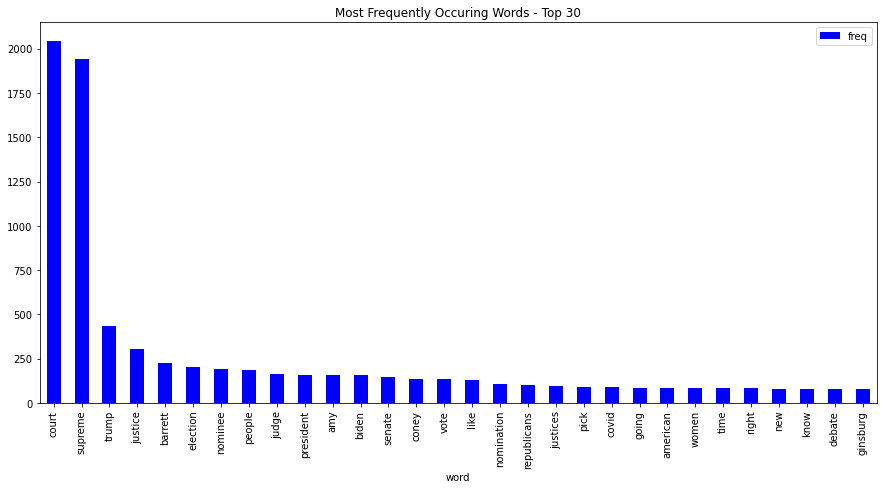

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

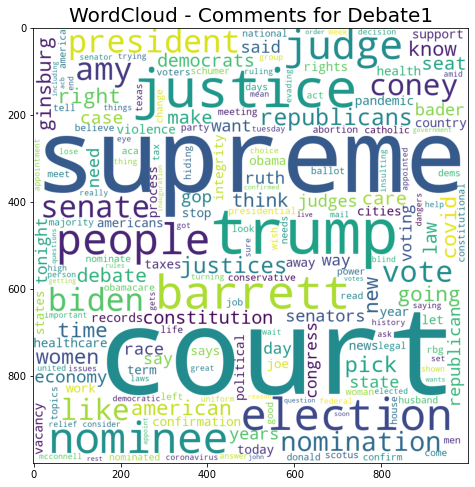

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

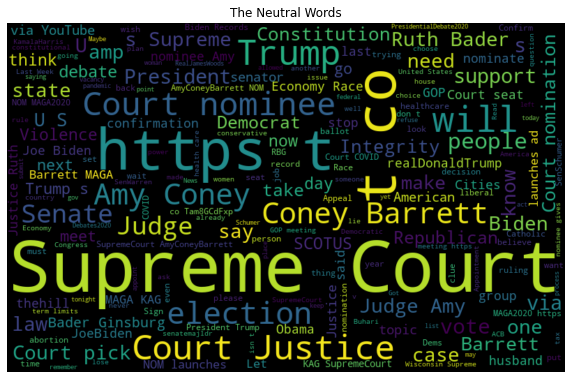

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

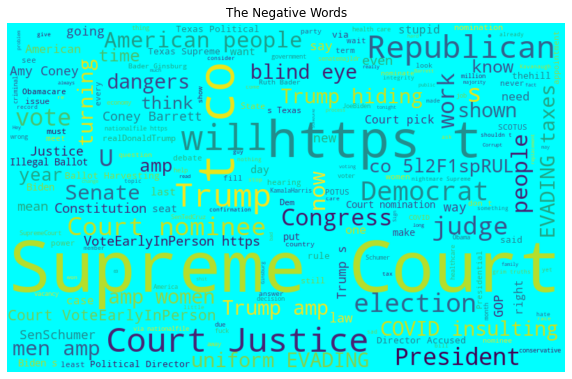

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

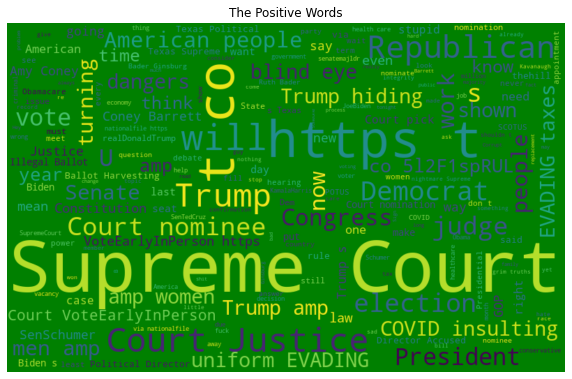

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,she was the first Justice to preside over gay ...,Positive
1,…Supreme Court where Republicans managed to ge...,Positive
2,@JoeBiden If Obamacare is so awesome why would...,Positive
3,@BidenWarRoom Please focus on the Supreme Cour...,Neutral
4,@Jordanfabian @jdawsey1 Someone should confron...,Negative
...,...,...
1995,@Women4Biden @senatemajldr he's afraid to say ...,Positive
1996,@KaustubhMehta97 @rohini_sgh Yea right as if o...,Positive
1997,Do the Supreme Court Justices kind of “Watch O...,Positive
1998,The next #SupremeCourt nominee goes to Washing...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Positive,she was the first justice to preside over gay ...
1,Positive,supreme court where republicans managed to get...
2,Positive,if obamacare is so awesome why would anyone wa...
3,Neutral,please focus on the supreme court the national...
4,Negative,someone should confront trump as to whether hi...
...,...,...
1995,Positive,he s afraid to say why he s blocking more covi...
1996,Positive,sgh yea right as if our supreme court is going...
1997,Positive,do the supreme court justices kind of watch ov...
1998,Neutral,the next supremecourt nominee goes to washingt...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
0,Positive,she was the first justice to preside over gay ...
1,Positive,supreme court where republicans managed to get...
2,Positive,if obamacare is so awesome why would anyone wa...
11,Positive,they have two fix the total mess mcconnell cau...
14,Positive,goes on to explain history of red lining and s...
...,...,...
1977,Negative,covid response trump tax fraud evasion while g...
1981,Negative,biden s texas political director accused of il...
1982,Negative,seriously how do you feel now that the evangel...
1984,Negative,vice presidential nominee kamala harris on mon...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
0,1,she was the first justice to preside over gay ...
1,1,supreme court where republicans managed to get...
2,1,if obamacare is so awesome why would anyone wa...
11,1,they have two fix the total mess mcconnell cau...
14,1,goes on to explain history of red lining and s...
...,...,...
1977,0,covid response trump tax fraud evasion while g...
1981,0,biden s texas political director accused of il...
1982,0,seriously how do you feel now that the evangel...
1984,0,vice presidential nominee kamala harris on mon...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(942, 2)
(315, 2)


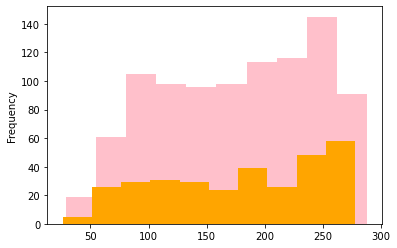

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(386968, 596780)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('behind', 0.6620564460754395),
 ('selection', 0.6499885320663452),
 ('three', 0.642953634262085),
 ('forever', 0.6332475543022156),
 ('convince', 0.62079918384552),
 ('action', 0.6206748485565186),
 ('donald', 0.6179409027099609),
 ('mcgrath', 0.6078484058380127),
 ('lead', 0.6063682436943054),
 ('draft', 0.6058931350708008)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('pre', -0.2476797103881836),
 ('existing', -0.25766971707344055),
 ('aca', -0.265719473361969),
 ('from', -0.2672364115715027),
 ('healthcare', -0.269351601600647),
 ('maga', -0.27770739793777466),
 ('conditions', -0.28191447257995605),
 ('end', -0.28233200311660767),
 ('case', -0.2906205654144287),
 ('coverage', -0.2912837862968445)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(942, 500)
(942,)
(315, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.4031746031746032
F1 score : 0.4161490683229813
[[ 60  38]
 [150  67]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9915074309978769
Validation Accuracy : 0.4031746031746032
f1 score : 0.41250000000000003
[[ 61  37]
 [151  66]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.526984126984127
f1 score : 0.6189258312020461
[[ 45  53]
 [ 96 121]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9097664543524416
Validation Accuracy : 0.6857142857142857
f1 score : 0.8135593220338984
[[  0  98]
 [  1 216]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 demand that republican senators respect the will of the people and wait until after the inauguration to consider a supreme court nominee our health care and our rights depend on it sign the petition via wedissent false 

First sample after preprocessing: 
 [464  11 125 151 424   1  21   7   1  35   6 309 133  93   1 310   4 196
   5   3   2  63  41 145  96   6  41 134  14  15   1  87 393   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6539 - accuracy: 0.6305 - val_loss: 0.6196 - val_accuracy: 0.6947
Epoch 2/20
7/7 - 1s - loss: 0.6276 - accuracy: 0.6824 - val_loss: 0.6156 - val_accuracy: 0.6947
Epoch 3/20
7/7 - 1s - loss: 0.6170 - accuracy: 0.6824 - val_loss: 0.6156 - val_accuracy: 0.6947
Epoch 4/20
7/7 - 1s - loss: 0.6103 - accuracy: 0.6824 - val_loss: 0.6138 - val_accuracy: 0.6947
Epoch 5/20
7/7 - 1s - loss: 0.6019 - accuracy: 0.6824 - val_loss: 0.6054 - val_accuracy: 0.6947
Epoch 6/20
7/7 - 1s - loss: 0.5879 - accuracy: 0.6824 - val_loss: 0.5987 - val_accuracy: 0.6947
Epoch 7/20
7/7 - 1s - loss: 0.5639 - accuracy: 0.6824 - val_loss: 0.5893 - val_accuracy: 0.6947
Epoch 8/20
7/7 - 1s - loss: 0.5339 - accuracy: 0.7013 - val_loss: 0.5760 - val_accuracy: 0.7053
Epoch 9/20
7/7 - 1s - loss: 0.4951 - accuracy: 0.7367 - val_loss: 0.5587 - val_accuracy: 0.7158
Epoch 10/20
7/7 - 1s - loss: 0.4488 - accuracy: 0.7946 - val_loss: 0.5325 - val_accuracy: 0.7158
Epoch 11/20
7/7 - 1s - loss: 0.3929 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,1,she was the first justice to preside over gay ...
1,1,supreme court where republicans managed to get...
2,1,if obamacare is so awesome why would anyone wa...
3,-1,please focus on the supreme court the national...
4,0,someone should confront trump as to whether hi...
...,...,...
1995,1,he s afraid to say why he s blocking more covi...
1996,1,sgh yea right as if our supreme court is going...
1997,1,do the supreme court justices kind of watch ov...
1998,-1,the next supremecourt nominee goes to washingt...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.416
F1 score : [0.32258065 0.12345679 0.54740608]
[[ 45  23 121]
 [ 16  10  71]
 [ 29  32 153]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.892
Validation Accuracy : 0.388
f1 score : [0.25714286 0.16759777 0.52865065]
[[ 36  33 120]
 [ 18  15  64]
 [ 37  34 143]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.998
Validation Accuracy : 0.348
f1 score : [0.33436533 0.1991342  0.43497758]
[[54 45 90]
 [29 23 45]
 [51 66 97]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.826
Validation Accuracy : 0.504
f1 score : [0.48093842 0.         0.60498221]
[[ 82   0 107]
 [ 26   0  71]
 [ 44   0 170]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['cubans seems they fall into the biden classification of you ain t black the distinction even made it into grutter v bollinger supreme court decision which cited academics denying cubans were hispanic because they were republicans heaven forbid they think for themselves', 'the analysts see a number of issues playing into trump s favor that may not be showing up in the polls including the supreme court nomination gun ownership and the african american vote they missed the suburban immigrant vote too just saying', 'i hope she gets in to the supreme court your sleepy party would have done the same thing you are such a pandering hypocrite', 'what is the use of having a supreme court if it is biased toward one party there should be equal number of slots on each side and one other party as the tie breaker', 'this is fascinating given a year s time and the current supreme court nomination', 'shellym time sensitive going on today supreme court conference t

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4926 - accuracy: 0.2089 - val_loss: 0.1830 - val_accuracy: 0.2000
Epoch 2/20
11/11 - 2s - loss: 0.2916 - accuracy: 0.1993 - val_loss: 0.0064 - val_accuracy: 0.2000
Epoch 3/20
11/11 - 2s - loss: 0.2562 - accuracy: 0.1993 - val_loss: 0.0623 - val_accuracy: 0.2000
Epoch 4/20
11/11 - 2s - loss: 0.2375 - accuracy: 0.1993 - val_loss: 0.0860 - val_accuracy: 0.2000
Epoch 5/20
11/11 - 2s - loss: 0.2376 - accuracy: 0.1993 - val_loss: 0.0019 - val_accuracy: 0.2000
Epoch 6/20
11/11 - 2s - loss: 0.1648 - accuracy: 0.1993 - val_loss: -3.6730e-02 - val_accuracy: 0.2000
Epoch 7/20
11/11 - 2s - loss: 0.0077 - accuracy: 0.1993 - val_loss: -2.5238e-01 - val_accuracy: 0.2000
Epoch 8/20
11/11 - 2s - loss: -4.2811e-01 - accuracy: 0.1993 - val_loss: -8.3496e-01 - val_accuracy: 0.2000
Epoch 9/20
11/11 - 2s - loss: -1.5863e+00 - accuracy: 0.2163 - val_loss: -2.5010e+00 - val_accuracy: 0.2133
Epoch 10/20
11/11 - 2s - loss: -4.7205e+00 - accuracy: 0.2652 - val_loss: -6.2552e+00 - 